## node2vec

### Setup

First of all, we install and import necessary libraries such as the node2vec.

If you are curious to learn how to implement fast random walks on graphs, I recommend you to [read the blog post](https://urldefense.com/v3/__https://www.singlelunch.com/2019/08/01/700x-faster-node2vec-models-fastest-random-walks-on-a-graph/__;!!Mih3wA!FEx33y1EDmjpebbdYaTA4U_7UrKV-B0ewGtktLMpaiNTZbbWeYnctiA51srcZ8xuC4WnJ1q8f1sLqiKwZcRHOQ$ ) which explains some of the design choices behind this library.

In [20]:
from node2vec import Node2Vec
import networkx as nx

Lastly, let's import some of the common libraries needed for our task.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity

%matplotlib inline

## Task 1

In [22]:
A = np.array([[0,1,1,0], [1,0,1,0],[1,1,0,1],[0,0,1,0]])

In [23]:
D = np.diag(np.sum(A, axis = 1))
D

array([[2, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 1]])

In [24]:
M = (np.linalg.inv(D)).dot(A)
M

array([[0.        , 0.5       , 0.5       , 0.        ],
       [0.5       , 0.        , 0.5       , 0.        ],
       [0.33333333, 0.33333333, 0.        , 0.33333333],
       [0.        , 0.        , 1.        , 0.        ]])

In [25]:
r = np.ones(M.shape[0]) / np.sum(np.ones(M.shape[0]))
for i in range(10):
    r = M.dot(r)
    print(r)

r = r/ np.sum(r)
r

[0.25 0.25 0.25 0.25]
[0.25 0.25 0.25 0.25]
[0.25 0.25 0.25 0.25]
[0.25 0.25 0.25 0.25]
[0.25 0.25 0.25 0.25]
[0.25 0.25 0.25 0.25]
[0.25 0.25 0.25 0.25]
[0.25 0.25 0.25 0.25]
[0.25 0.25 0.25 0.25]
[0.25 0.25 0.25 0.25]


array([0.25, 0.25, 0.25, 0.25])

## Task 2

### Example

In [26]:
# Load the Zachary's Karate Club as a NetworkX Graph object
KCG = nx.karate_club_graph()
nx.info(KCG)

'Graph named "Zachary\'s Karate Club" with 34 nodes and 78 edges'

In [27]:
# Fit embedding model to the Karate Club graph
node2vec = Node2Vec(KCG, dimensions=128, walk_length=40, num_walks=100, workers=2)
n2v = node2vec.fit(window=10, min_count=1)

Generating walks (CPU: 2): 100%|██████████| 50/50 [00:00<00:00, 155.37it/s]


### Your Task

Create a small wrapper class which will expose only the few hyperparameters you will need to tune the Node2Vec

In [28]:
# YOUR CODE HERE
class Node2VecWrapper:
    def __init__(self, graph, dimensions=2, walk_length=40, num_walks=100, p=1, q=1, workers = 1):
        self.graph = graph
        self.dimensions = dimensions
        self.walk_length = walk_length
        self.num_walks = num_walks
        self.p = p
        self.q = q
        self.workers = workers
        self.node2vec_model = None

    def train(self):
        node2vec = Node2Vec(self.graph, dimensions=self.dimensions, walk_length=self.walk_length,
                            num_walks=self.num_walks, p=self.p, q=self.q, workers=self.workers)
        self.node2vec_model = node2vec.fit(window=10, min_count=1)

    def get_embedding(self):
        return np.array([self.node2vec_model.wv[str(node)] for node in range(len(self.graph))])

Construct a pandas dataframe with the 2D embeddings from node2vec, plus the club name that each node belongs to after the split.

In [29]:
# KCG.nodes(data = True)
# node_embeddings = node2vec_wrapper.node2vec_model.wv
# # transform = TSNE  # PCA

# # trans = transform(n_components=2)
# # node_embeddings_2d = trans.fit_transform(node_embeddings)
# # node_embeddings_2d
# node_embeddings
# embeddings = np.array([n2v_model.wv[str(node)] for node in range(len(KCG))])


# [my_n2v.wv[str(node)] for node in KCG.nodes]

In [30]:
node2vec_wrapper = Node2VecWrapper(KCG, dimensions=2, walk_length=40, num_walks=100, p=1, q=1, workers=2)
node2vec_wrapper.train()

embeddings = np.array([node2vec_wrapper.node2vec_model.wv[str(node)] for node in range(len(KCG))])
# embeddings = node2vec_wrapper.get_embedding()

# YOUR CODE HERE
# Get 2D embeddings and club names
# embeddings = []
club_names = []
for node in KCG.nodes():
    # embedding = node2vec_wrapper.node2vec_model.wv[str(node)]
    # embeddings.append(embedding)
    club_names.append(KCG.nodes[node]['club'])

# Construct a pandas DataFrame
df = pd.DataFrame(embeddings, columns=['x', 'y'])
df['club'] = [KCG.nodes[node]['club'] for node in range(len(KCG))]

# Now, df contains the 2D embeddings and club names for each node
df

# df = pd.DataFrame(embeddings, columns=['x', 'y', 'club'])

Generating walks (CPU: 2): 100%|██████████| 50/50 [00:00<00:00, 138.17it/s]


x         y     club
0  -0.843477  0.510288   Mr. Hi
1  -0.812558  0.318367   Mr. Hi
2  -0.784768 -0.015019   Mr. Hi
3  -0.813884  0.357190   Mr. Hi
4  -0.917919  0.973010   Mr. Hi
5  -0.949569  1.090732   Mr. Hi
6  -0.944667  1.090989   Mr. Hi
7  -0.813172  0.363904   Mr. Hi
8  -0.783486 -0.191838   Mr. Hi
9  -0.786056 -0.214194  Officer
10 -0.931996  1.027744   Mr. Hi
11 -0.849176  0.639398   Mr. Hi
12 -0.826975  0.388288   Mr. Hi
13 -0.802701  0.208116   Mr. Hi
14 -0.806739 -0.709578  Officer
15 -0.795327 -0.643307  Officer
16 -1.015237  1.289150   Mr. Hi
17 -0.819680  0.462209   Mr. Hi
18 -0.811328 -0.747570  Officer
19 -0.800522  0.163497   Mr. Hi
20 -0.793223 -0.591741  Officer
21 -0.825789  0.453652   Mr. Hi
22 -0.808084 -0.709675  Officer
23 -0.814172 -0.869565  Officer
24 -0.804454 -0.670364  Officer
25 -0.799345 -0.632546  Officer
26 -0.819942 -0.858979  Officer
27 -0.791072 -0.557681  Officer
28 -0.780624 -0.238660  Officer
29 -0.817468 -0.819717  Officer
30 -0.782340 -0.244201  Officer
31 -0.788371 -0.370094  Officer
32 -0.802752 -0.603160  Officer
33 -0.802028 -0.551358  Officer

Nodes who stayed with the Mr. Hi will be plotted in red, while nodes who moved with the Officer will be plotted in blue

In [ ]:
# # YOUR CODE HERE

cmap = {'Mr. Hi':'Red', 'Officer': 'Blue'}
colors = df['club'].map(cmap)
plt.scatter(x = df['x'], y = df['y'], c=colors)

If your example trained correctly, you should notice a clear separation between the blue and red nodes.  Solely from the graph structure, node2vec could predict how the Zachary's Karate Club split!

Tune the hyperparameters ```p``` and ```q```, and notice how they affect the resulting embeddings.

Now you will study the behavior of node2vec on [barbell graphs](https://urldefense.com/v3/__https://en.wikipedia.org/wiki/Barbell_graph).*5Cn__;JQ!!Mih3wA!FEx33y1EDmjpebbdYaTA4U_7UrKV-B0ewGtktLMpaiNTZbbWeYnctiA51srcZ8xuC4WnJ1q8f1sLqiJXmVCxjQ$ 

Below you can see a toy example of a barbell graph generated with NetworkX.

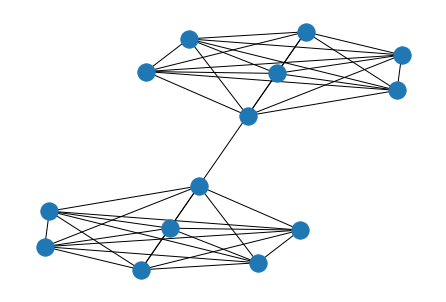

In [31]:
toy_barbell = nx.barbell_graph(7, 0)
nx.draw_kamada_kawai(toy_barbell)




Generate a larger barbell graph, where each complete graph has exactly 1000 nodes, and the path length between the complete graphs is equal to 1 (i.e., all the nodes in the barbell graph belong to either one of the two complete graphs, and the connecting path does not have any internal node).

Then, learn node2vec embeddings on this graph, setting ```p = 1, q = 1``` and ```d = 10```.

In [ ]:
# YOUR CODE HERE
thousand_barbell = nx.barbell_graph(500, 0)
node2vec_wrapper_thousand = Node2VecWrapper(thousand_barbell, dimensions=10, walk_length=40, num_walks=100, p=1, q=1, workers=2)
node2vec_wrapper_thousand.train()


In [ ]:
thousand_barbell_embeddings = np.array([node2vec_wrapper_thousand.node2vec_model.wv[str(node)] for node in range(len(thousand_barbell))])
thousand_barbell_embeddings

Write a function that takes as input a node id ```n``` in the graph (e.g., ```5```) and returns a list containing the cosine similarity between the node2vec vector of the input node ```n``` and all the nodes in the given barbell graph (including the similarity with ```n``` itself).

In [ ]:
# YOUR CODE HERE
def calculate_sim(n):
    model = node2vec_wrapper.node2vec_model
    # Get the embedding of the input node
    input_node_embedding = model.wv[str(n)]
    
    # Calculate cosine similarity with all nodes in the graph
    similarities = []
    for node in thousand_barbell.nodes():
        node_embedding = model.wv[str(node)]
        similarity = cosine_similarity([input_node_embedding], [node_embedding])[0][0]
        similarities.append(similarity)
    return similarities

calculate_sim(5)

Generate another barbell graph, this time adding a path of length 51 between the two complete graphs. To find out how, refer to the NetworkX documentation: [https://urldefense.com/v3/__https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.classic.barbell_graph.html*networkx.generators.classic.barbell_graph*(https:/*networkx.github.io/documentation/stable/reference/generated/networkx.generators.classic.barbell_graph.html*networkx.generators.classic.barbell_graph)*5Cn__;I10vIyU!!Mih3wA!FEx33y1EDmjpebbdYaTA4U_7UrKV-B0ewGtktLMpaiNTZbbWeYnctiA51srcZ8xuC4WnJ1q8f1sLqiKlerV3og$ 

Learn the node2vec embeddings for the nodes of this new graph, using the same hyperparameters as before.

In [ ]:
# YOUR CODE HERE
fiftyone_barbell = nx.barbell_graph(500, 51)
node2vec_wrapper_fiftyone = Node2VecWrapper(fiftyone_barbell, dimensions=10, walk_length=40, num_walks=100, p=1, q=1, workers=1)
node2vec_wrapper_fiftyone.train()

In [ ]:
fiftyone_embeddings = np.array([node2vec_wrapper_fiftyone.node2vec_model.wv[str(node)] for node in range(len(thousand_barbell))])
fiftyone_embeddings